In [2]:
!wget https://www.utdallas.edu/~sxr190067/dog-breed-identification.zip

--2021-07-08 23:26:52--  https://www.utdallas.edu/~sxr190067/dog-breed-identification.zip
Resolving www.utdallas.edu (www.utdallas.edu)... 3.21.250.42, 3.133.32.155
Connecting to www.utdallas.edu (www.utdallas.edu)|3.21.250.42|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://personal.utdallas.edu/~sxr190067/dog-breed-identification.zip [following]
--2021-07-08 23:26:53--  https://personal.utdallas.edu/~sxr190067/dog-breed-identification.zip
Resolving personal.utdallas.edu (personal.utdallas.edu)... 129.110.182.249
Connecting to personal.utdallas.edu (personal.utdallas.edu)|129.110.182.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 724495926 (691M) [application/zip]
Saving to: ‘dog-breed-identification.zip.1’

dog-breed-identific 100%[===================>] 690.93M  3.01MB/s    in 3m 51s  

2021-07-08 23:30:44 (2.99 MB/s) - ‘dog-breed-identification.zip.1’ saved [724495926/724495926]



In [5]:
!unzip dog-breed-identification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/84

In [7]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as Imgen

from keras.models import Sequential,load_model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,GlobalAveragePooling2D,Dropout,BatchNormalization

from keras.preprocessing import image

import cv2

import pickle

In [8]:
labels = pd.read_csv("./labels.csv")
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [9]:
def addjpg(id):
    return id+".jpg"

labels['id'] = labels['id'].apply(addjpg)

In [10]:
datagen = Imgen(preprocessing_function=keras.applications.nasnet.preprocess_input,
                  shear_range=0.2,
                  zoom_range=0.2,
                  horizontal_flip=True,
                  validation_split=0.3
                 )

In [11]:
train_data = datagen.flow_from_dataframe(
    labels,
    directory = './train', 
    x_col = 'id',
    y_col = 'breed',
    subset="training",
    color_mode="rgb",
    target_size = (331,331),
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=123,
)


Found 7156 validated image filenames belonging to 120 classes.


In [12]:
test_data = datagen.flow_from_dataframe(
    labels,
    directory = './train',
    x_col = 'id',
    y_col = 'breed',
    subset="validation",
    color_mode="rgb",
    target_size = (331,331),
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=123,
)

Found 3066 validated image filenames belonging to 120 classes.


In [13]:
a = train_data.class_indices
class_names = list(a.keys())
class_names[:10]

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle']

In [14]:
x,y = next(train_data)
x.shape

(32, 331, 331, 3)

In [15]:
  def plot_images(img,labels):
    plt.figure(figsize=[15,10])
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(img[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

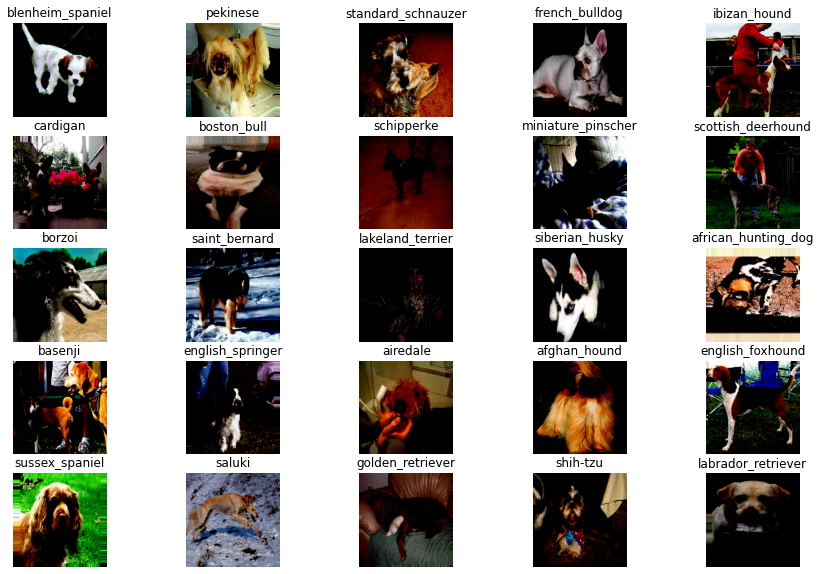

In [16]:
plot_images(x,y)

In [17]:
from keras.applications.nasnet import NASNetLarge
from keras.applications.inception_resnet_v2 import InceptionResNetV2

In [18]:
base_model = InceptionResNetV2(include_top=False,
                     weights='imagenet',
                     input_shape=(331,331,3)
                     )
base_model.trainable = False

219070464/219055592 [==============================] - 2s 0us/step


In [ ]:
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 165, 165, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 165, 165, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 165, 165, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [ ]:
model1 = Sequential([
    base_model,
    
    GlobalAveragePooling2D(),
    
    Dense(256,activation = 'relu'),
    Dropout(0.5),
    
    Dense(120,activation='softmax')
])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 9, 9, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1536)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               393472    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 120)               30840     
Total params: 54,761,048
Trainable params: 424,312
Non-trainable params: 54,336,736
_________________________________________________________________


In [ ]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist1 = model1.fit(train_data,epochs=10,validation_data=test_data)


Epoch 1/10
224/224 [==============================] - 335s 1s/step - loss: 2.7490 - accuracy: 0.4809 - val_loss: 0.3454 - val_accuracy: 0.9022
Epoch 2/10
224/224 [==============================] - 279s 1s/step - loss: 0.4675 - accuracy: 0.8809 - val_loss: 0.2833 - val_accuracy: 0.9090
Epoch 3/10
224/224 [==============================] - 280s 1s/step - loss: 0.4032 - accuracy: 0.8897 - val_loss: 0.2982 - val_accuracy: 0.9074
Epoch 4/10
224/224 [==============================] - 278s 1s/step - loss: 0.3504 - accuracy: 0.9024 - val_loss: 0.2858 - val_accuracy: 0.9100
Epoch 5/10
224/224 [==============================] - 277s 1s/step - loss: 0.3380 - accuracy: 0.9000 - val_loss: 0.2865 - val_accuracy: 0.9067
Epoch 6/10
224/224 [==============================] - 277s 1s/step - loss: 0.2954 - accuracy: 0.9111 - val_loss: 0.2961 - val_accuracy: 0.9142
Epoch 7/10
224/224 [==============================] - 276s 1s/step - loss: 0.2850 - accuracy: 0.9129 - val_loss: 0.2983 - val_accuracy: 0.9113

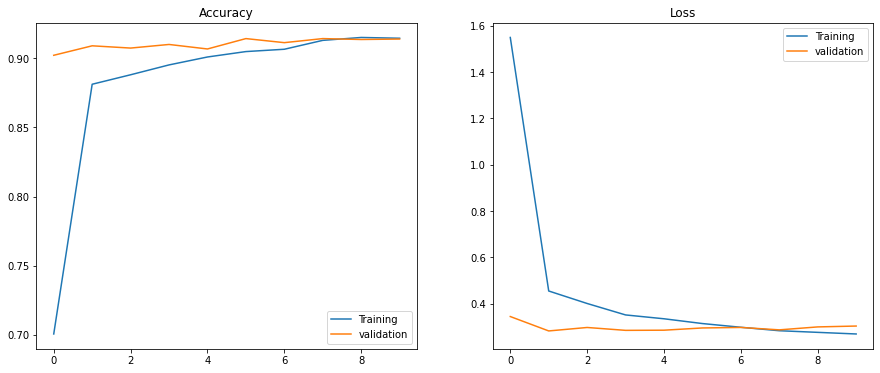

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist1.epoch,hist1.history['accuracy'],label = 'Training')
plt.plot(hist1.epoch,hist1.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist1.epoch,hist1.history['loss'],label = 'Training')
plt.plot(hist1.epoch,hist1.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
testgen = Imgen(preprocessing_function=keras.applications.inception_resnet_v2.preprocess_input)
sample = pd.read_csv('./sample_submission.csv')
sample['id'] = sample['id'].apply(addjpg)


In [ ]:

testing_set = testgen.flow_from_dataframe(
    sample,
    directory = './test',
    x_col = 'id',
    y_col = None,
    target_size = (331,331),
    class_mode= None,
    batch_size=32,
    shuffle=False,
    validate_filenames=False
)

Found 10357 non-validated image filenames.


In [ ]:
testing_predictions = model1.predict(testing_set,verbose=1)

324/324 [==============================] - 144s 398ms/step


In [ ]:
testing_pred  = [np.argmax(i) for i in testing_predictions]

In [ ]:
testing_X = next(testing_set)
testing_X.shape

(32, 331, 331, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

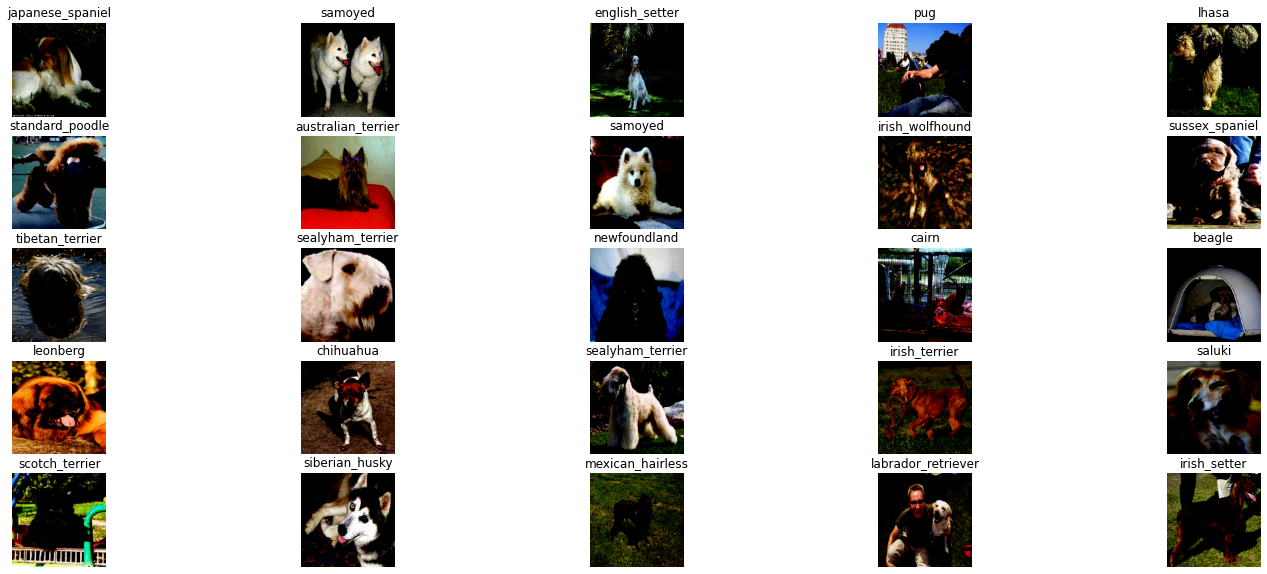

In [ ]:
def show_images(img):
    plt.figure(figsize=[25,10])
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(img[i])
        plt.title(class_names[testing_pred[i]])
        plt.axis('off')

show_images(testing_X)


In [ ]:
mod1_predictions = model.predict(test_data,verbose=1)

96/96 [==============================] - 98s 865ms/step


In [ ]:
mod1_pred = [np.argmax(i) for i in mod1_predictions]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

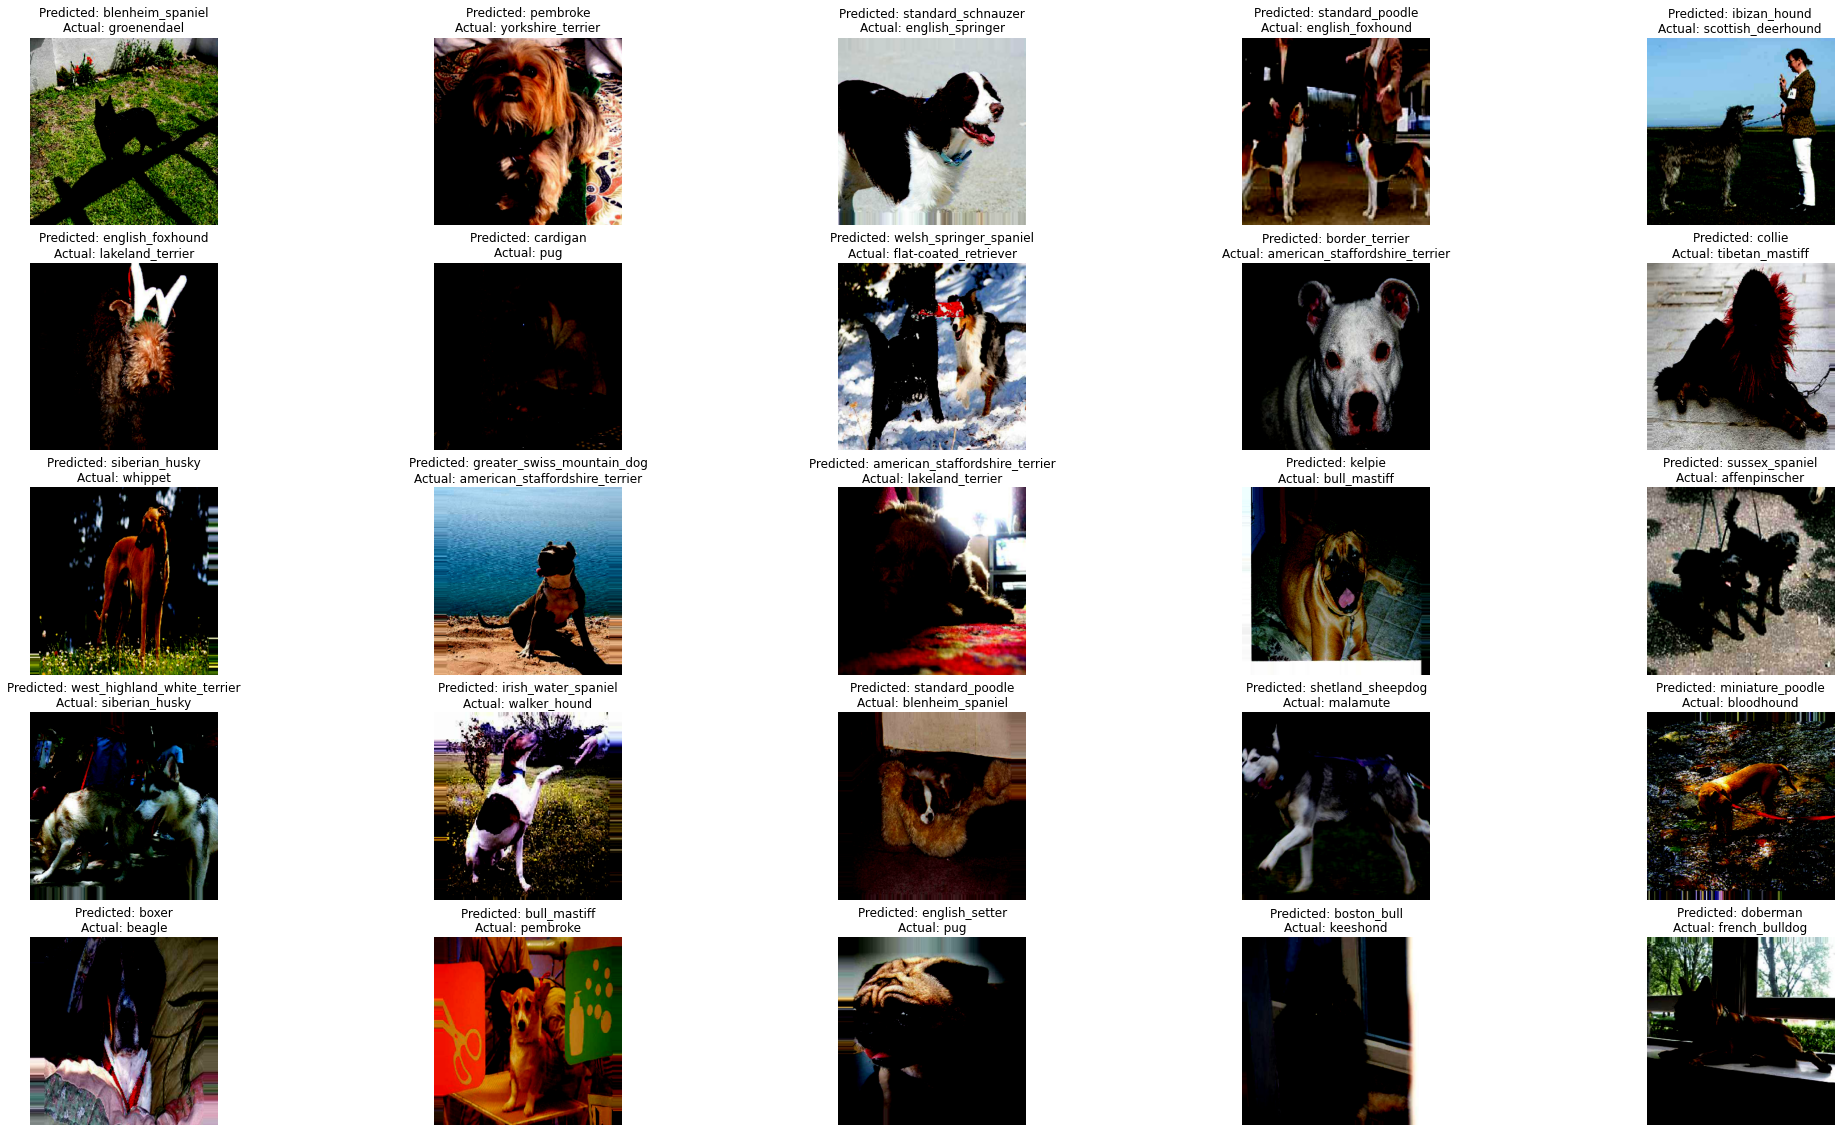

In [40]:
mod1_X,mod1_Y = next(test_data)

def show_images(img,labels):
    plt.figure(figsize=[35,20])
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(img[i])
        plt.title('Predicted: '+class_names[mod1_pred[i]]+'\n'+'Actual: '+class_names[np.argmax(labels[i])])
        plt.axis('off')

show_images(mod1_X,mod1_Y)


In [19]:
model2 = Sequential([
    base_model,

    Conv2D(256,(4,4),activation = 'relu'),
    BatchNormalization(axis=-1),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation = 'relu'),
    Dropout(0.5),
    
    Dense(120,activation='softmax')
])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 9, 9, 1536)        54336736  
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 6, 6, 256)         6291712   
_________________________________________________________________
batch_normalization_203 (Bat (None, 6, 6, 256)         1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               590080    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [20]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
hist2 = model2.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
224/224 [==============================] - 432s 2s/step - loss: 2.5782 - accuracy: 0.4768 - val_loss: 0.6155 - val_accuracy: 0.8578
Epoch 2/10
224/224 [==============================] - 313s 1s/step - loss: 0.7628 - accuracy: 0.8214 - val_loss: 0.5086 - val_accuracy: 0.8888
Epoch 3/10
224/224 [==============================] - 313s 1s/step - loss: 0.5650 - accuracy: 0.8561 - val_loss: 0.4378 - val_accuracy: 0.8940
Epoch 4/10
224/224 [==============================] - 314s 1s/step - loss: 0.5010 - accuracy: 0.8693 - val_loss: 0.4745 - val_accuracy: 0.8862
Epoch 5/10
224/224 [==============================] - 311s 1s/step - loss: 0.4596 - accuracy: 0.8780 - val_loss: 0.4959 - val_accuracy: 0.8956
Epoch 6/10
224/224 [==============================] - 313s 1s/step - loss: 0.4088 - accuracy: 0.8918 - val_loss: 0.4325 - val_accuracy: 0.8973
Epoch 7/10
224/224 [==============================] - 312s 1s/step - loss: 0.4546 - accuracy: 0.8857 - val_loss: 0.4942 - val_accuracy: 0.9048

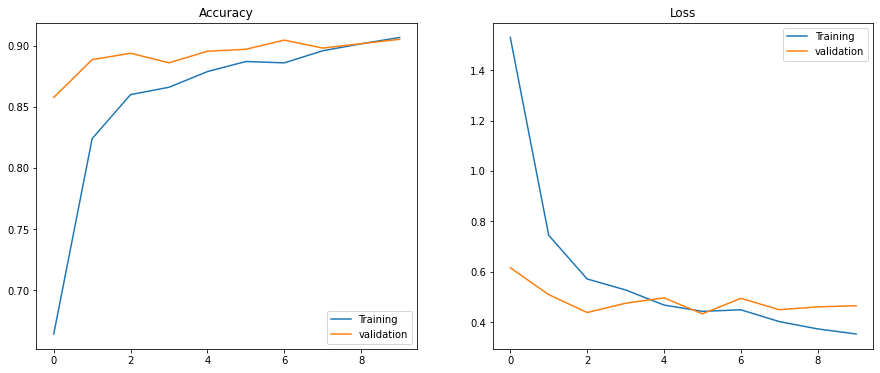

In [22]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist2.epoch,hist2.history['accuracy'],label = 'Training')
plt.plot(hist2.epoch,hist2.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist2.epoch,hist2.history['loss'],label = 'Training')
plt.plot(hist2.epoch,hist2.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

In [23]:
mod2_predictions = model2.predict(test_data,verbose=1)

96/96 [==============================] - 113s 973ms/step


In [24]:
mod2_pred = [np.argmax(i) for i in mod2_predictions]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

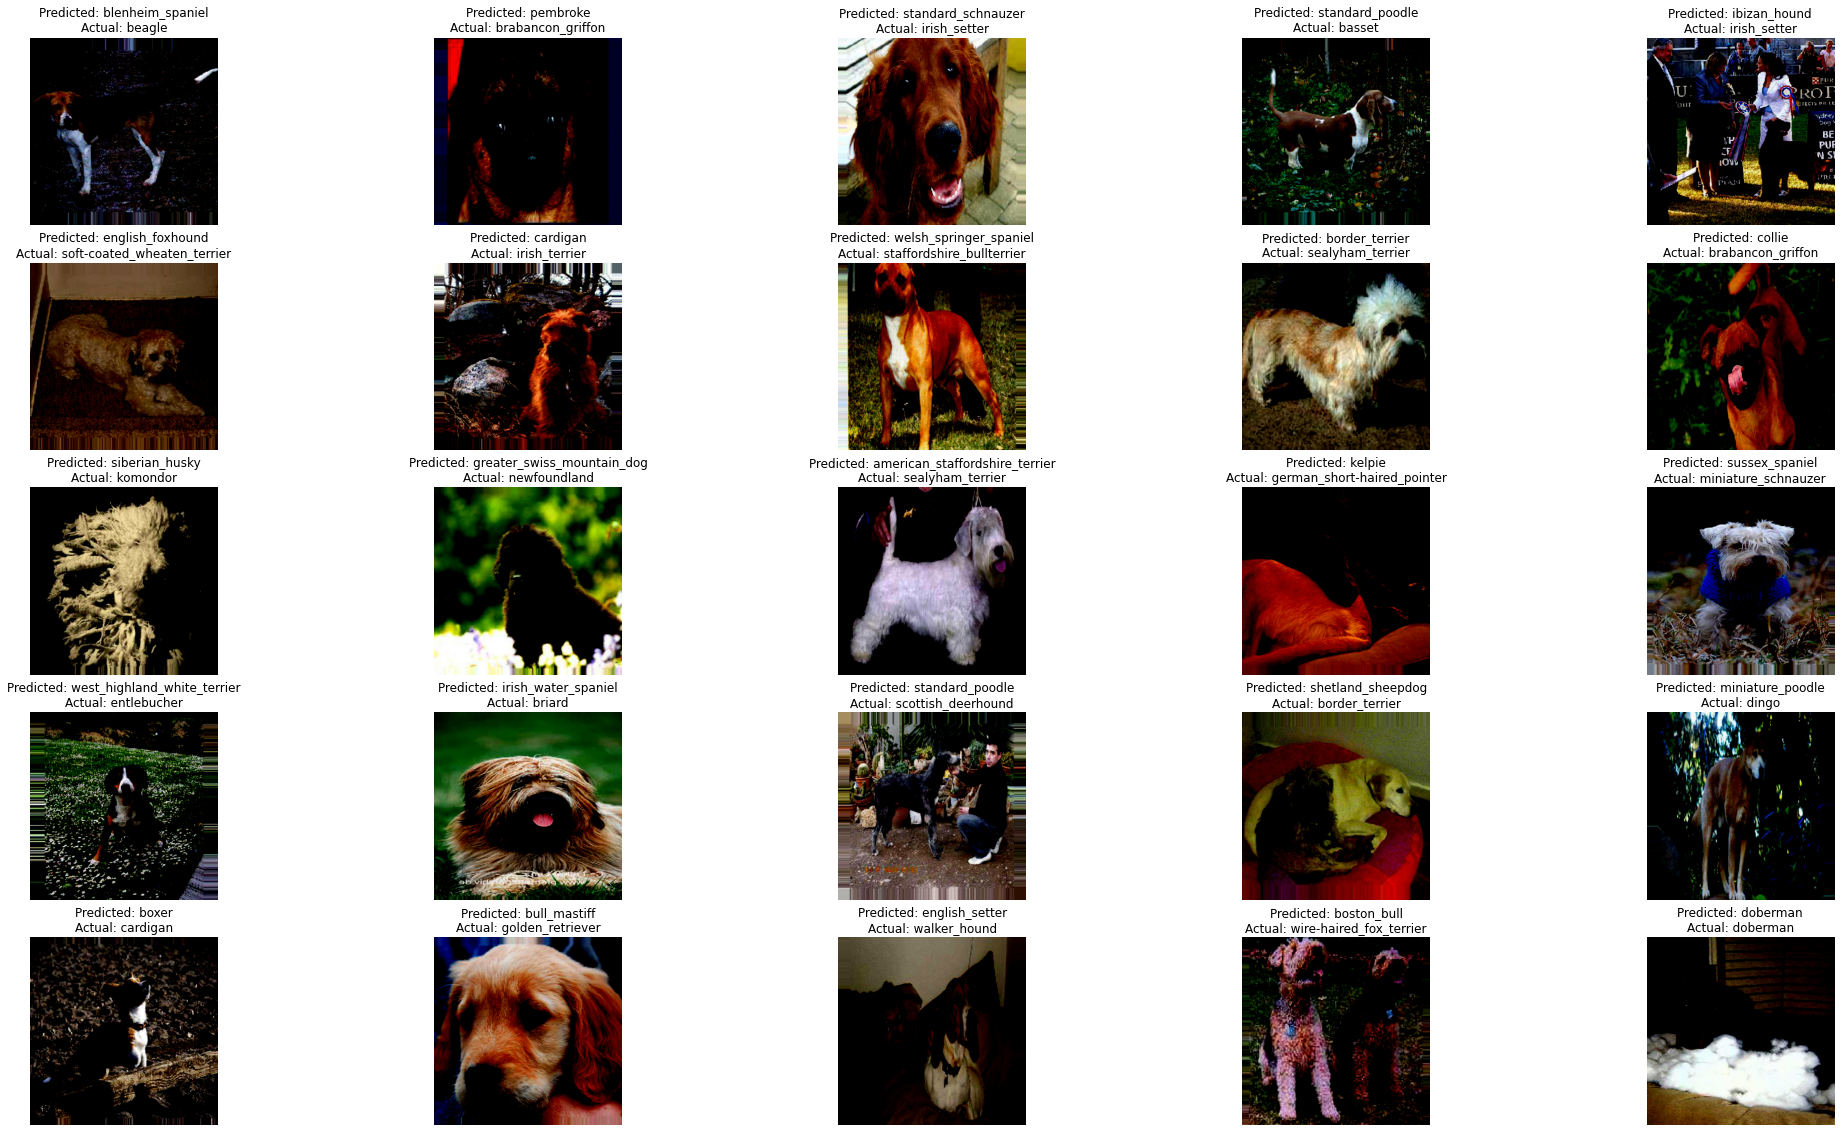

In [39]:
mod2_X,mod2_Y = next(test_data)

def show_images(img,labels):
    plt.figure(figsize=[35,20])
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(img[i])
        plt.title('Predicted: '+class_names[mod2_pred[i]]+'\n'+'Actual: '+class_names[np.argmax(labels[i])])
        plt.axis('off')

show_images(mod2_X,mod2_Y)

In [31]:
model3 = Sequential([
    base_model,

    Conv2D(256,(5,5),activation = 'relu'),
    BatchNormalization(axis=-1),
    Conv2D(256,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(256,activation = 'relu'),
    
    Dense(120,activation='softmax')
])
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 9, 9, 1536)        54336736  
_________________________________________________________________
conv2d_214 (Conv2D)          (None, 5, 5, 256)         9830656   
_________________________________________________________________
batch_normalization_207 (Bat (None, 5, 5, 256)         1024      
_________________________________________________________________
conv2d_215 (Conv2D)          (None, 3, 3, 256)         590080    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 256)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 256)              

In [32]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
hist3 = model3.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
224/224 [==============================] - 375s 1s/step - loss: 2.1183 - accuracy: 0.5651 - val_loss: 0.7591 - val_accuracy: 0.8343
Epoch 2/10
224/224 [==============================] - 308s 1s/step - loss: 0.5716 - accuracy: 0.8603 - val_loss: 0.6355 - val_accuracy: 0.8575
Epoch 3/10
224/224 [==============================] - 307s 1s/step - loss: 0.5145 - accuracy: 0.8709 - val_loss: 0.5083 - val_accuracy: 0.8826
Epoch 4/10
224/224 [==============================] - 290s 1s/step - loss: 0.4120 - accuracy: 0.8842 - val_loss: 0.5082 - val_accuracy: 0.8787
Epoch 5/10
224/224 [==============================] - 286s 1s/step - loss: 0.3483 - accuracy: 0.9018 - val_loss: 0.4821 - val_accuracy: 0.8770
Epoch 6/10
224/224 [==============================] - 278s 1s/step - loss: 0.3735 - accuracy: 0.8989 - val_loss: 0.5190 - val_accuracy: 0.8810
Epoch 7/10
224/224 [==============================] - 277s 1s/step - loss: 0.2823 - accuracy: 0.9134 - val_loss: 0.5077 - val_accuracy: 0.8744

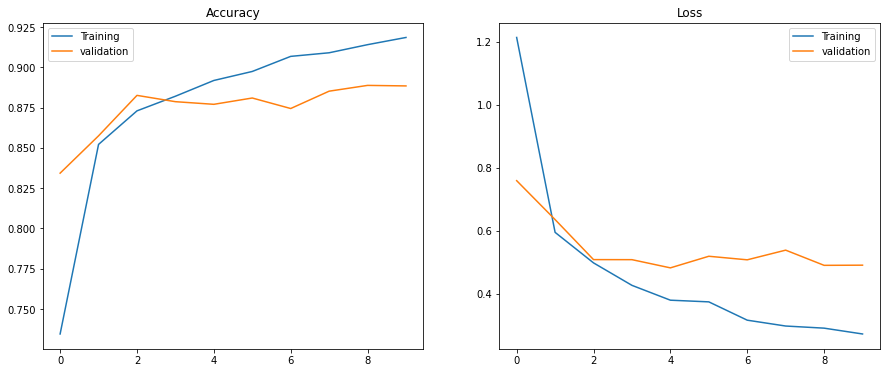

In [34]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist3.epoch,hist3.history['accuracy'],label = 'Training')
plt.plot(hist3.epoch,hist3.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist3.epoch,hist3.history['loss'],label = 'Training')
plt.plot(hist3.epoch,hist3.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

In [35]:
mod3_predictions = model3.predict(test_data,verbose=1)

96/96 [==============================] - 99s 863ms/step


In [36]:
mod3_pred = [np.argmax(i) for i in mod3_predictions]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

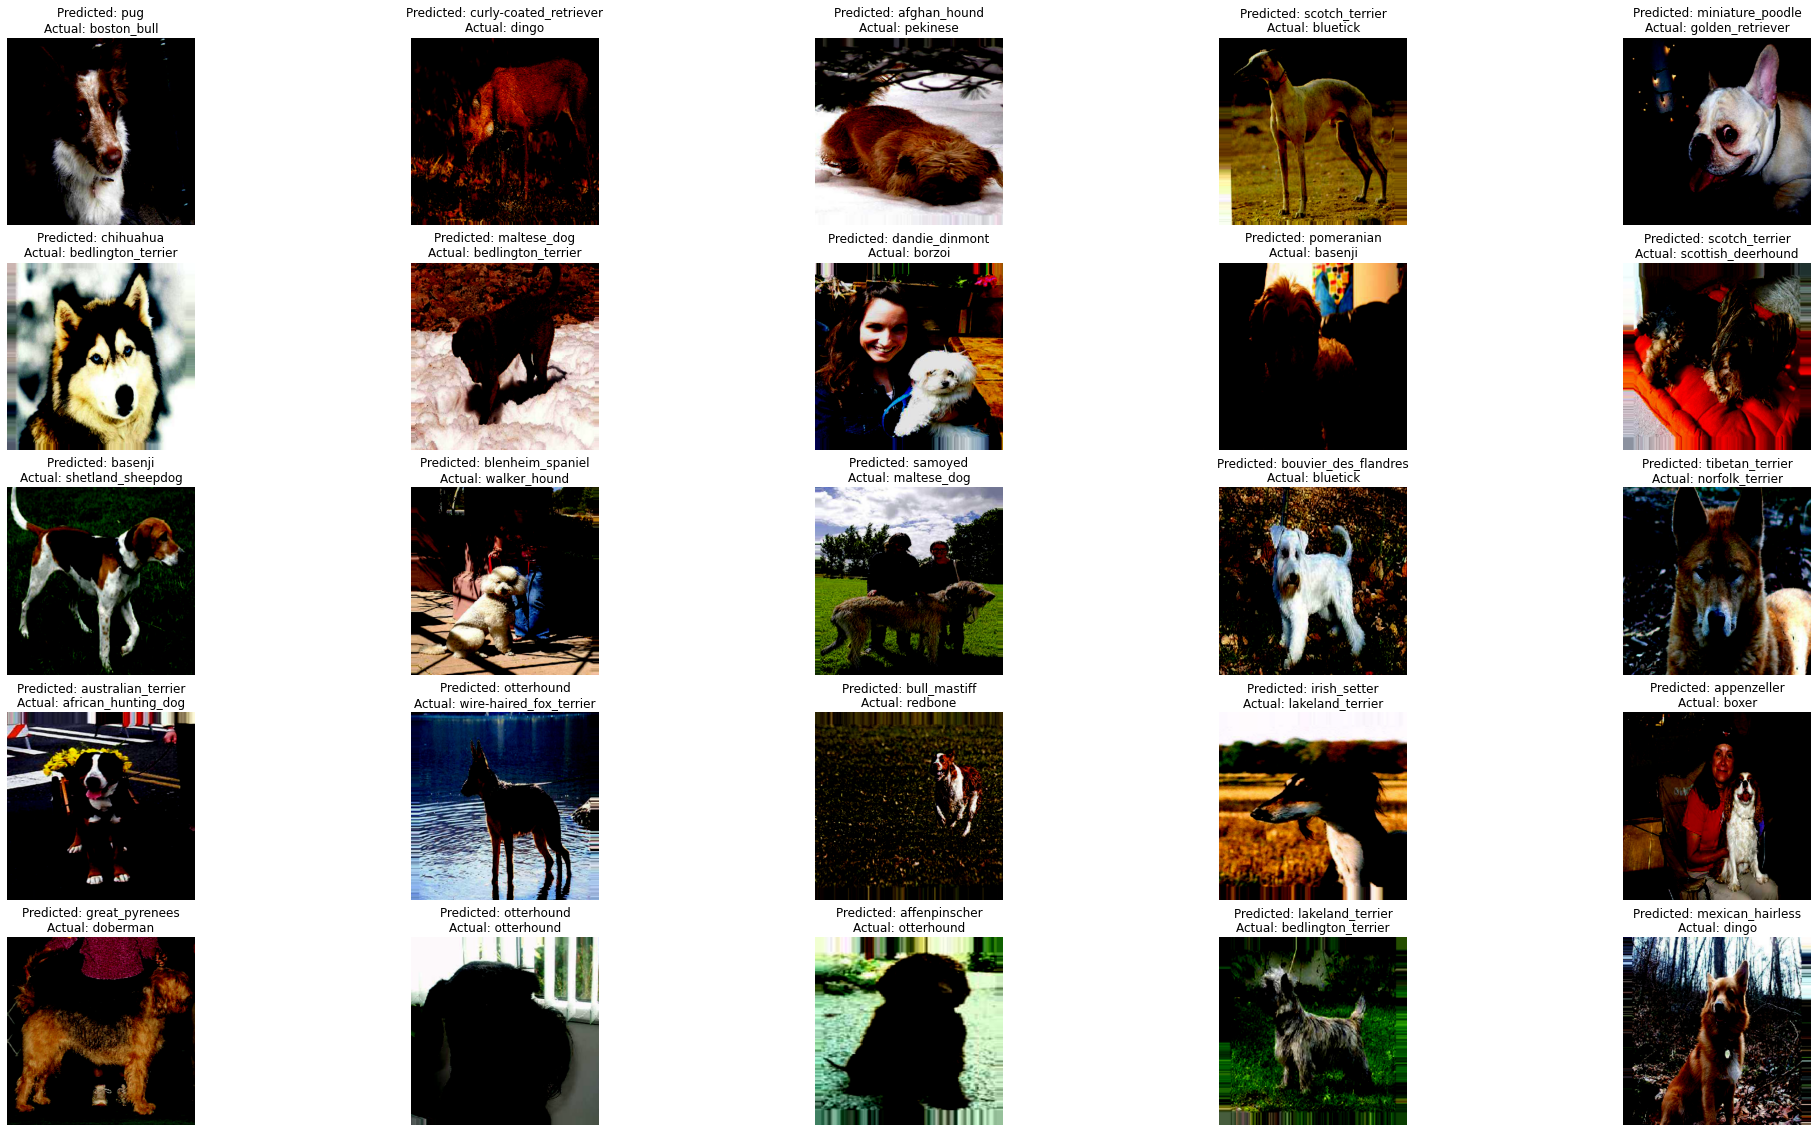

In [38]:
mod3_X,mod3_Y = next(test_data)

def show_images(img,labels):
    plt.figure(figsize=[35,20])
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(img[i])
        plt.title('Predicted: '+class_names[mod3_pred[i]]+'\n'+'Actual: '+class_names[test_data.classes[i]])
        plt.axis('off')

show_images(mod3_X,mod3_Y)